# Praca domowa 4

### Autor: Jakub Piwko

## Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


### Rozwiązanie:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

**a)** Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

In [7]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.EU_Sales > df.NA_Sales)].reset_index(drop = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


**b)** Jak rodzaj gry zarobił najwięcej w roku 2010?

In [8]:
df.loc[(df.Year == 2010)].iloc[df["Global_Sales"].idxmax()]

Rank                                16
Name                Kinect Adventures!
Platform                          X360
Year                              2010
Genre                             Misc
Publisher       Microsoft Game Studios
NA_Sales                         14.97
EU_Sales                          4.94
JP_Sales                          0.24
Other_Sales                       1.67
Global_Sales                     21.82
Name: 15, dtype: object

**c)** Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [6]:
tmp = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean")
tmp.loc[tmp.EU_Sales < tmp.JP_Sales].reset_index()[["Genre", "JP_Sales"]].rename(columns = 
                                                                                 {'Genre': 'Typ Gry', 
                                                                                  'JP_Sales': 'Średnia sprzedaż w Japonii'},
                                                                                 inplace = False).sort_values('Średnia sprzedaż w Japonii')


,Typ Gry,Średnia sprzedaż w Japonii
2,Strategy,0.073284
0,Puzzle,0.099439
1,Role-Playing,0.238293


# -------------------------------------------------------------------------------------------------

## Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Rozwiązanie:

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt

#### Oryginalny wykres:

![](./Oryginalny.png)
Wykres ze strony: https://www.nik.gov.pl/aktualnosci/gospodarka-majatkowa-i-finansowa-telewizji-polskiej.html


#### Wykres poprawiony przy użyciu ggplot2:

<img src = "Poprawiony.png" style="height:250px;height:500px"/>
Link do pracy domowej: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/PiwkoJakub/HW2_raport.pdf

#### Wykres poprawiony w Pythonie:

In [131]:
#Tworzę ramkę z potrzebnymi danymi, które pochodzą z tej samej strony, co wykres.
data = {'Rok' : [2014, 2015, 2016, 2017, 2018, 2019],
        'Przychody z reklam' : [901.9, 922.3, 872.3, 798.7, 911.9, 973.7],
        'Przychody ogółem': [1495.7, 1581.2, 1473.5, 1777.3, 2205, 2707.3]}
df = pd.DataFrame(data)
tmp = df["Przychody ogółem"] - df["Przychody z reklam"]
df["Pozostałe przychody"] = tmp

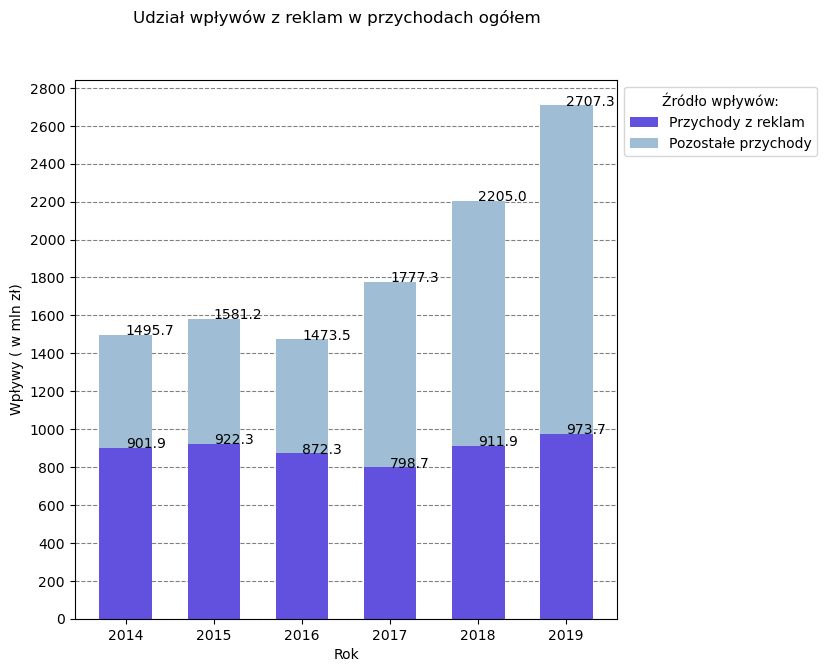

In [130]:
#Rysowanie wykresu
plt.rcParams['axes.axisbelow'] = True
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
fig.suptitle("Udział wpływów z reklam w przychodach ogółem")
plt.grid(which='major', axis='y', color = "grey", linestyle='dashed')
plt.xlabel("Rok")
plt.ylabel("Wpływy ( w mln zł)")
p1 = plt.bar(df["Rok"], height = df["Przychody ogółem"], color = "#9fbdd5", width = 0.6)
p2 = plt.bar(df["Rok"], df["Przychody z reklam"], color = "#6251de", width = 0.6)
ax.set_yticks([i for i in range(0,3000,200)])
plt.legend((p2[0], p1[0]), ('Przychody z reklam', 'Pozostałe przychody'), 
           title = "Źródło wpływów:", bbox_to_anchor=(1, 1))
for rok, prz, pos in zip(df["Rok"].tolist(), df["Przychody ogółem"].tolist(), df["Przychody ogółem"].tolist()):
   plt.text(rok, prz, pos)
for rok, prz, pos in zip(df["Rok"].tolist(), df["Przychody z reklam"].tolist(), df["Przychody z reklam"].tolist()):
   plt.text(rok, prz, pos)


#### Uzasadnienie:

Nowy wykres w stosunku do tego wykonanego w ggplot ma lepiej oznaczoną skalę Y. Jest na niej więcej wartości, dzięki czemu jest czytelniejsza. Lepiej wygląda tło. Zamiast białej siatki na mdłym szarym panelu, teraz postawiłem na białe tło i bardziej wyrazistą ciemną siatkę, składającą się tylko z poziomych linii, gdyż te pionowe są zbędne. Siatka ma większe zagęszczenie, przez to że skala Y jest dokładniejsza, co ułatwia porównywanie wysokości słupków. Dodatkowo dodałem napisy z dokładnymi wartościami słupków, zarówno dla całego słupka, jak i dla części z przychodami z reklam. Dzięki temu odczyt danych będzie precyzyjny. Daje to też możliwość porównywania słupków po dokładnych wartościach, w przypadku gdy porównywanie ich wysokości nie wystarczy. 